In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import galpy.potential
import thesis_rcparams
import tstrippy

# Show our gravitational potential

In [67]:
def xy_force_potential(potential,params,xlims,ylims,Nquiver,Ngrid):
    """
    Plot the forces in the x and y directions for the potential of Pouliasis et al. (2017)
    """
    # get the parameters
    XsQuiver,YsQuiver=np.meshgrid(np.linspace(xlims[0],xlims[1],Nquiver),np.linspace(ylims[0],ylims[1],Nquiver))
    XsQuiver,YsQuiver=XsQuiver.flatten(),YsQuiver.flatten()
    Fx,Fy,_,_=potential(params,XsQuiver,YsQuiver,np.zeros_like(XsQuiver))
    F = np.sqrt(Fx**2+Fy**2)
    Fxnorm,Fynorm = Fx/F,Fy/F
    # upsample for phi 
    Xs,Ys=np.meshgrid(np.linspace(xlims[0],xlims[1],Ngrid),np.linspace(ylims[0],ylims[1],Ngrid))
    Xs,Ys=Xs.flatten(),Ys.flatten()
    Phi=potential(params,Xs,Ys,np.zeros_like(Xs))[3]
    # reshape back to grid
    Xs=Xs.reshape(Ngrid,Ngrid)
    Ys=Ys.reshape(Ngrid,Ngrid)
    Phi=Phi.reshape(Ngrid,Ngrid)
    return (XsQuiver,YsQuiver,Fxnorm,Fynorm),(Xs,Ys,Phi)

def xz_force_potential(potential,params,xlims,zlims,Nquiver,Ngrid):
    """
    Plot the forces in the x and y directions for the potential of Pouliasis et al. (2017)
    """
    XsQuiver,ZsQuiver=np.meshgrid(np.linspace(xlims[0],xlims[1],Nquiver),np.linspace(zlims[0],zlims[1],Nquiver))
    XsQuiver,ZsQuiver=XsQuiver.flatten(),ZsQuiver.flatten()
    Fx,Fy,Fz,_=potential(params,XsQuiver,np.zeros_like(XsQuiver),ZsQuiver)
    F = np.sqrt(Fx**2+Fy**2+Fz**2)
    Fxnorm,Fznorm = Fx/F,Fz/F
    # upsample for phi 
    Xs,Zs=np.meshgrid(np.linspace(xlims[0],xlims[1],Ngrid),np.linspace(zlims[0],zlims[1],Ngrid))
    Xs,Zs=Xs.flatten(),Zs.flatten()
    Phi=potential(params,Xs,np.zeros_like(Xs),Zs)[3]
    # reshape back to grid
    Xs=Xs.reshape(Ngrid,Ngrid)
    Zs=Zs.reshape(Ngrid,Ngrid)
    Phi=Phi.reshape(Ngrid,Ngrid)
    return (XsQuiver,ZsQuiver,Fxnorm,Fznorm),(Xs,Zs,Phi)

In [264]:
# get the sampling points 
Nquiver=20
Ngrid=100
xlims=(-8,8)
ylims=(-8,8)
zlims=(-8,8)

In [265]:
MWparams=tstrippy.Parsers.pouliasis2017pii()
paramsHalo=MWparams[0:5]
paramsDisc1=MWparams[5:8]
paramsDisc1=np.concatenate(([MWparams[0]],paramsDisc1)).tolist()
paramsDisc2=MWparams[8:11]
paramsDisc2=np.concatenate(([MWparams[0]],paramsDisc2)).tolist()

In [266]:
# print all the central potential values 
_,_,_,PhiHalo=tstrippy.potentials.allensantillianhalo(paramsHalo,0,0,0)
print('PhiHalo:',PhiHalo)
_,_,_,PhiDisc1=tstrippy.potentials.miyamotonagai(paramsDisc1,0,0,0)
print('PhiDisc1:',PhiDisc1)
_,_,_,PhiDisc2=tstrippy.potentials.miyamotonagai(paramsDisc2,0,0,0)
print('PhiDisc2:',PhiDisc2)
# get the max potential value
print("maxes")
_,_,_,PhiHalo=tstrippy.potentials.allensantillianhalo(paramsHalo,0,0,xlims[0])
print('PhiHalo:',PhiHalo)
_,_,_,PhiDisc1=tstrippy.potentials.miyamotonagai(paramsDisc1,0,0,xlims[0])
print('PhiDisc1:',PhiDisc1)
_,_,_,PhiDisc2=tstrippy.potentials.miyamotonagai(paramsDisc2,0,0,xlims[0])
print('PhiDisc2:',PhiDisc2)
# get the max value from the border 
vmax=np.max([PhiHalo,PhiDisc1,PhiDisc2])

PhiHalo: [-190593.39847984]
PhiDisc1: [-31613.87110173]
PhiDisc2: [-60581.49183223]
maxes
PhiHalo: [-142191.69036046]
PhiDisc1: [-12468.85581884]
PhiDisc2: [-16895.4042107]


In [308]:
# sample the range of values for the potential 
quiver,grid=xy_force_potential(tstrippy.potentials.pouliasis2017pii,MWparams,xlims,ylims,Nquiver,Ngrid)
phi=grid[2]
# normForce=mpl.colors.LogNorm(vmin=np.min(forceMag), vmax=np.max(forceMag))
# cmapForce=mpl.colormaps['grey_r']
minPhi=phi.flatten().min()
maxPhi=phi.flatten().max()
normPhi=mpl.colors.Normalize(vmin=minPhi, vmax=maxPhi)
cmapPhi=mpl.colormaps['rainbow_r']

linthresh = abs(minPhi) * 0.01  # Use 1% of your min value, adjust as needed
normPhi=mpl.colors.SymLogNorm(linthresh=linthresh, vmin=minPhi, vmax=vmax)
normPhi=mpl.colors.Normalize(vmin=0.95*minPhi, vmax=vmax)

quiverPARAMS = {
    "scale":25,
    "color" :"k",
}
pcolormeshPARAMS = {
    "cmap":cmapPhi,
    "norm":normPhi,
    "levels":5
}
print('minPhi:',minPhi)
print('maxPhi:',maxPhi)

yticks = np.arange(ylims[0], ylims[1], 4)
zticks = np.arange(zlims[0], zlims[1], 4)
xticks = np.arange(xlims[0], xlims[1]+1, 4)
AXIS00 = {"xticks":[], "yticks":yticks,
        "ylabel":"Thin Disc","title":"xy plane",}
AXIS01 = {"xticks":[], "yticks":[],
        "ylabel":"","title":"xz plane",}
AXIS10 = {"xticks":[], "yticks":yticks,
        "ylabel":"Thin Disc","title":"",}
AXIS11 = {"xticks":[], "yticks":[],
        "ylabel":"","title":"",}
AXIS20 = {"xticks":[], "yticks":yticks,
        "ylabel":"Martos Halo","title":"",}
AXIS21 = {"xticks":[], "yticks":[],
        "ylabel":"","title":"",}
AXIS30 = {"xticks":xticks, "yticks":yticks,
        "ylabel":"Total","title":"",
        "xlabel":"x [kpc]",}
AXIS31 = {"xticks":xticks, "yticks":[],
        "ylabel":"","title":"",
        "xlabel":"x [kpc]",}


minPhi: -281743.6238990166
maxPhi: -158258.51590030786


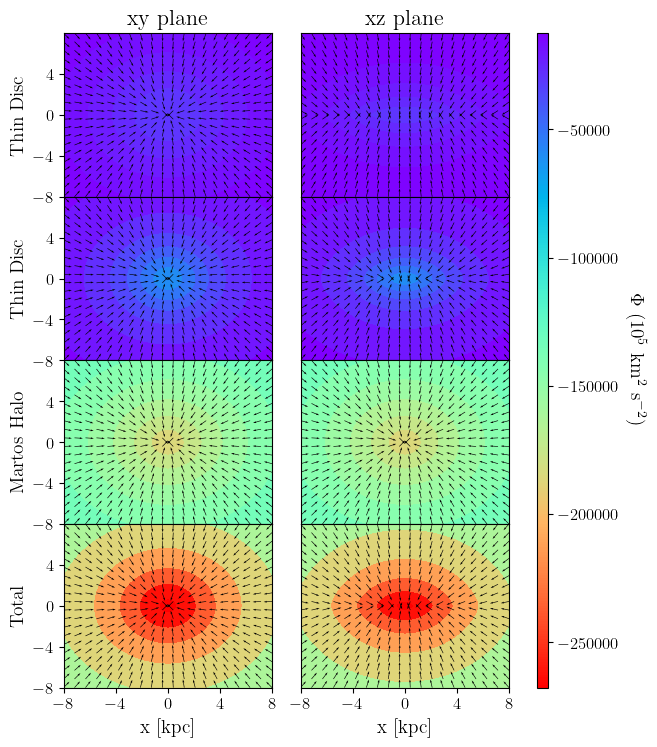

In [ ]:
fig=plt.figure(figsize=(8.25-2,11.5-3))
gs = mpl.gridspec.GridSpec(4, 3, hspace=0.0,width_ratios=[1,1,0.05],height_ratios=[1,1,1,1])
axes = []
for i in range(4):
    axes.append([])
    axes[i].append(fig.add_subplot(gs[i, 0]))
    axes[i].append(fig.add_subplot(gs[i, 1]))
cax = fig.add_subplot(gs[:, 2])
sm=mpl.cm.ScalarMappable(norm=normPhi, cmap=cmapPhi)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label(r'$\Phi$ ($10^5$ km$^2$ s$^{-2}$)', rotation=270, labelpad=20)
cticks=cbar.get_ticks()

# Set the colorbar ticks to be in the range of the potential
cbar.set_ticks(cticks)
# Format the tick labels properly (convert the values to strings with the division)
tick_labels = [f"{x/1e5:.1f}" for x in cticks]
# Set the formatted tick labels
cbar.set_ticklabels(tick_labels)


quiver,grid=xy_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc1,xlims,ylims,Nquiver,Ngrid)
axes[0][0].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[0][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc1,xlims,zlims,Nquiver,Ngrid)
axes[0][1].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[0][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)

quiver,grid=xy_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc2,xlims,ylims,Nquiver,Ngrid)
axes[1][0].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[1][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc2,xlims,zlims,Nquiver,Ngrid)
axes[1][1].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[1][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)

quiver,grid=xy_force_potential(tstrippy.potentials.allensantillianhalo,paramsHalo,xlims,ylims,Nquiver,Ngrid)
axes[2][0].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[2][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.allensantillianhalo,paramsHalo,xlims,zlims,Nquiver,Ngrid)
axes[2][1].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[2][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)


quiver,grid=xy_force_potential(tstrippy.potentials.pouliasis2017pii,MWparams,xlims,ylims,Nquiver,Ngrid)
axes[3][0].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[3][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.pouliasis2017pii,MWparams,xlims,zlims,Nquiver,Ngrid)
axes[3][1].contourf(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[3][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)

axes[0][0].set(**AXIS00);
axes[0][1].set(**AXIS01);
axes[1][0].set(**AXIS10);
axes[1][1].set(**AXIS11);
axes[2][0].set(**AXIS20);
axes[2][1].set(**AXIS21);
axes[3][0].set(**AXIS30);
axes[3][1].set(**AXIS31);




In [274]:
np.sqrt(5e4)

np.float64(223.60679774997897)

# show the vector field of the gravitational potential 

In [3]:
def GetForceGrid(galpyPotential,Rlim,Zmin,npointsQuiver):
    # make a list of positions 
    RsFlat=np.linspace(Rlim[0],Rlim[1],npointsQuiver)
    ZsFlat=np.linspace(Zmin[0],Zmin[1],npointsQuiver)
    RsFlat,ZsFlat = np.meshgrid(RsFlat,ZsFlat)
    RsFlat=RsFlat.flatten()
    ZsFlat=ZsFlat.flatten()
    # get the force at those positions
    Rforce = galpyPotential.Rforce(RsFlat,ZsFlat)
    zForce = galpyPotential.zforce(RsFlat,ZsFlat)
    Force = np.zeros((2,len(RsFlat)))
    Force[0,:] = Rforce
    Force[1,:] = zForce
    return RsFlat,ZsFlat,Force

In [4]:
a=4
b=1/20
disc=galpy.potential.MiyamotoNagaiPotential(amp=1,a=a,b=b)

In [5]:
npoints = 300
R = np.linspace(-10,10,npoints)
z = np.linspace(-10,10,npoints)
Rs,Zs = np.meshgrid(R,z)
DiscDensity = disc.dens(Rs,Zs)
phi=galpy.potential.evaluatePotentials(disc,Rs,Zs)

In [6]:
# get the forces
npointsQuiver = 10 
Rlim = (-10,10)
Zmin = (-10,10)
RFvec,ZFvec,Force = GetForceGrid(disc,Rlim,Zmin,npointsQuiver)
forceMag=np.linalg.norm(Force,axis=0)
forceNorm=Force/forceMag
# make  the force colors 
normForce=mpl.colors.LogNorm(vmin=np.min(forceMag), vmax=np.max(forceMag))
cmapForce=mpl.colormaps['grey_r']
colorsForce=cmapForce(normForce(forceMag))  

In [7]:
# make forces in the x-y plane 
xs=np.linspace(-10,10,300)
ys=np.linspace(-10,10,300)
X,Y=np.meshgrid(xs,ys)
R = np.sqrt(X**2+Y**2)
potential_z0=galpy.potential.evaluatePotentials(disc,R,0)
# now get the vector in the plane 
Rforce = disc.Rforce(R,0)
xs_quiv = np.linspace(-10,10,npointsQuiver)
ys_quiv = np.linspace(-10,10,npointsQuiver)
Xs_quiv,Ys_quiv = np.meshgrid(xs_quiv,ys_quiv)
Rpos_quiv = np.sqrt(Xs_quiv**2+Ys_quiv**2)
Rforce_quiv = disc.Rforce(Rpos_quiv,0)
# this is the magnitude at each position 
# make a vector field that points inward at each xy
Xs_quiv = Xs_quiv.flatten()
Ys_quiv = Ys_quiv.flatten()
Rforce_quiv = Rforce_quiv.flatten()
Rdist_quiv = np.sqrt(Xs_quiv**2+Ys_quiv**2)
xForceNorm = -Xs_quiv/Rdist_quiv
yForceNorm = -Ys_quiv/Rdist_quiv
# make the colors
colorsForceXY=cmapForce(normForce(np.abs(Rforce_quiv)))

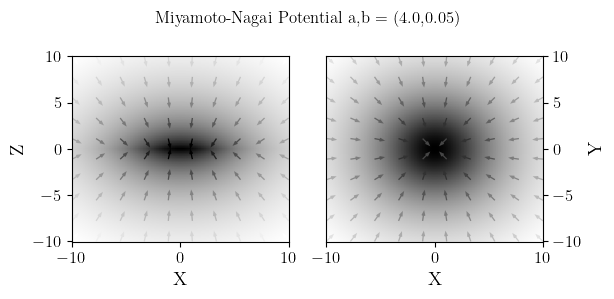

In [8]:
fig,axis = plt.subplots(1,2,figsize=(8.25-2,3))
axis[0].pcolormesh(Rs,Zs,phi,cmap='grey',shading='auto')
axis[0].quiver(RFvec,ZFvec,forceNorm[0],forceNorm[1],color=colorsForce,headlength=4,scale=20)
axis[1].pcolormesh(X,Y,potential_z0,cmap='grey',shading='auto')
axis[1].quiver(Xs_quiv,Ys_quiv,xForceNorm,yForceNorm,color=colorsForceXY,headlength=4,scale=20)
axis[0].set_xlabel('X ')
axis[0].set_ylabel('Z ')
axis[1].set_xlabel('X ')
axis[1].set_ylabel('Y ')
axis[1].yaxis.set_label_position("right")
axis[1].yaxis.tick_right()
fig.suptitle('Miyamoto-Nagai Potential a,b = ({:.1f},{:.2f})'.format(a,b))
fig.tight_layout()
fig.savefig('../images/MiyamotoNagaiPotential.png',dpi=300)

## Look at the potential that we used in tstrippy

In [9]:
def setupfigre():
    fig=plt.figure(figsize=(8.25-2,11.5-4))
    gs = fig.add_gridspec(4, 2)
    axes=[]
    axes.append(fig.add_subplot(gs[0, 0]))
    axes.append(fig.add_subplot(gs[0, 1]))
    axes.append(fig.add_subplot(gs[1, 0]))
    axes.append(fig.add_subplot(gs[1, 1]))
    axes.append(fig.add_subplot(gs[2, 0]))
    axes.append(fig.add_subplot(gs[2, 1]))
    axes.append(fig.add_subplot(gs[3, 0]))
    axes.append(fig.add_subplot(gs[3, 1]))
    return fig,axes

In [10]:
NFW = galpy.potential.NFWPotential(amp=0.6,a=4)
disc1=galpy.potential.MiyamotoNagaiPotential(amp=0.4,a=1,b=0.2)
disc2=galpy.potential.MiyamotoNagaiPotential(amp=0.4,a=1,b=0.2)
mygalaxy = NFW+disc1+disc2

In [11]:
# make a grid of points 
npoints = 300
Rs = np.linspace(0.1,10,npoints)
Zs = np.linspace(-10,10,npoints)
Rss,Zss = np.meshgrid(Rs,Zs)

In [12]:
total_potential=galpy.potential.evaluatePotentials(mygalaxy,Rss,Zss)
norm=mpl.colors.Normalize(vmin=np.min(total_potential), vmax=np.max(total_potential)/10)

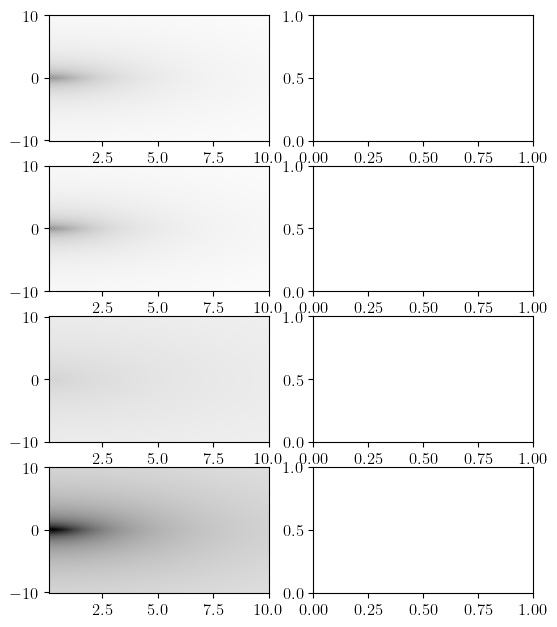

In [13]:
fig,axes=setupfigre()
axes[0].pcolormesh(Rss,Zss,galpy.potential.evaluatePotentials(disc1,Rss,Zss),cmap='grey',shading='auto',norm=norm)
axes[2].pcolormesh(Rss,Zss,galpy.potential.evaluatePotentials(disc2,Rss,Zss),cmap='grey',shading='auto',norm=norm)
axes[4].pcolormesh(Rss,Zss,galpy.potential.evaluatePotentials(NFW,Rss,Zss),cmap='grey',shading='auto',norm=norm)
axes[6].pcolormesh(Rss,Zss,total_potential,cmap='grey',shading='auto',norm=norm)
fig.savefig('../images/Pouliasis2017piiPotential.png',dpi=300)

# The martos potential

In [1]:
import sympy as sp 

In [10]:
x,gamma = sp.symbols('x gamma', real=True)
integrand = x**(gamma) / (1+x)**(gamma-1)
integrand
ok=sp.integrate(integrand,x)

In [ ]:

# Define symbols
x, gamma, r, r_cutoff, G = sp.symbols('x gamma r r_cutoff G', real=True, positive=True)

# Define mass function
mass_func = x**gamma / (1+x)**(gamma-1)

# Calculate potential for x < r_cutoff
potential_inner = -G * sp.integrate(mass_func/x**2, (x, r, sp.oo))

# For x > r_cutoff, the mass is constant
mass_cutoff = r_cutoff**gamma / (1+r_cutoff)**(gamma-1)
potential_outer = -G * sp.integrate(mass_cutoff/x**2, (x, r, sp.oo))

# # Simplify the expressions
potential_inner_simplified = sp.simplify(potential_inner)
potential_outer_simplified = sp.simplify(potential_outer)


In [21]:
potential_outer

-G*r_cutoff**gamma*(r_cutoff + 1)**(1 - gamma)/r

In [20]:
potential_inner_simplified = sp.simplify(potential_inner)